
=== Linear Kernel SVM ===
Accuracy: 0.9766
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


=== RBF Kernel SVM ===
Accuracy: 0.9708
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Fitting 5 folds for each of 16 candidates, totalling 80 fits

=== Best Hyperparameters (RBF Kernel) ===
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

=== Tuned RBF Kernel SVM ===
Accuracy: 0.9883
              precision    recall  f1-score   support

           0 

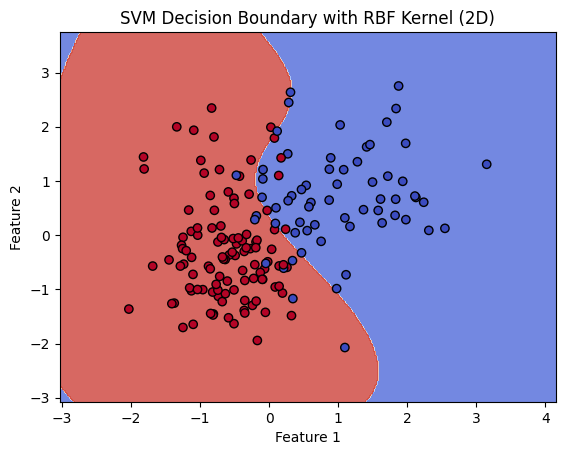

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset (Breast Cancer Dataset)
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. SVM with Linear Kernel
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

print("\n=== Linear Kernel SVM ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print(classification_report(y_test, y_pred_linear))

# 2. SVM with RBF Kernel
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

print("\n=== RBF Kernel SVM ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print(classification_report(y_test, y_pred_rbf))

# 3. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("\n=== Best Hyperparameters (RBF Kernel) ===")
print(grid.best_params_)

# Evaluate best model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("\n=== Tuned RBF Kernel SVM ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

# 4. Cross-validation Score
scores = cross_val_score(best_svm, X, y, cv=5)
print("\n=== Cross-Validation Scores ===")
print(f"Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")

# 5. Optional - Visualization with 2 Features (for boundary plot)
# Select 2 features for visualization
X_vis = X[:, :2]  # Taking first 2 features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)

svc_vis = SVC(kernel='rbf', C=1, gamma='scale')
svc_vis.fit(X_train_vis, y_train_vis)

# Plot Decision Boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary with RBF Kernel (2D)')
    plt.show()

plot_decision_boundary(X_test_vis, y_test_vis, svc_vis)